In [17]:
import numpy as np
import pandas as pd
from FS import feature_select, delete_zero_and_var
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale, RobustScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
plt.figure(dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

In [3]:
# 读取cvs训练数据集
cvs_path = "./data/csv/Molecular_Descriptor_train.csv"
df = pd.read_csv(cvs_path, index_col=0).drop("SMILES", axis=1)

In [4]:
del_df = delete_zero_and_var(df, 0.0)
corrmat = del_df.corr()


最终剩余特征数 504
sum=0特征:  225 方差过小特征:  0
['nB', 'nBondsQ', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'nsNH3p', 'nssNH2p', 'nsssNHp', 'nddsN', 'naOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'nddsP', 'nsssssP', 'nssssssS', 'nSm', 'nsGeH3', 'nssGeH2', 'nsssGeH', 'nssssGe', 'nsAsH2', 'nssAsH', 'nsssAs', 'ndsssAs', 'nddsAs', 'nsssssAs', 'nsSeH', 'ndSe', 'nssSe', 'naaSe', 'ndssSe', 'nssssssSe', 'nddssSe', 'nsSnH3', 'nssSnH2', 'nsssSnH', 'nssssSn', 'nsPbH3', 'nssPbH2', 'nsssPbH', 'nssssPb', 'SHsNH3p', 'SHssNH2p', 'SHsssNHp', 'SHmisc', 'SsLi', 'SssBe', 'SssssBem', 'SsBH2', 'SssBH', 'SsssB', 'SssssBm', 'SddC', 'SsNH3p', 'SssNH2p', 'SsssNHp', 'SddsN', 'SaOm', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SddsP', 'SsssssP', 'SssssssS', 'SSm', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', 'SdsssAs', 'SddsAs', 'SsssssAs', 'SsSeH', 'SdSe', 'SssS

In [18]:

raw_selected = ['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'minsOH', 'nC',
                'nT6Ring', 'n6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR',
                'maxsssN', 'SP-5', 'CrippenLogP', "MDEC-22"]

raw_selected = ['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'nC',
                'nT6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR',"WPOL",
                'SP-5', 'CrippenLogP', "MDEC-22",'nBonds2','Zagreb',]

# 从20-30挑选
add_b30 = ['ATSp4', 'VAdjMat']
# 从随机森林挑选
add_eft = ['ATSc3']
#
add_rfe = ["ETA_EtaP_L"]
fianl_feature = raw_selected + add_b30 + add_eft + add_rfe
print(fianl_feature)

['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'nC', 'nT6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR', 'WPOL', 'SP-5', 'CrippenLogP', 'MDEC-22', 'nBonds2', 'Zagreb', 'ATSp4', 'VAdjMat', 'ATSc3', 'ETA_EtaP_L']


In [19]:
print(type(del_df))
# 特征选择
input = del_df[fianl_feature]
input = input.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print("\t\tMinMax normalization\n ", input)
y = df["pIC50"]
X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.2, random_state=0, shuffle=True)



<class 'pandas.core.frame.DataFrame'>
		MinMax normalization
         MDEC-23     MLogP  LipoaffinityIndex    maxsOH        nC   nT6Ring  \
0     0.523470  0.538462           0.595082  0.799380  0.215909  0.571429   
1     0.575281  0.589744           0.642885  0.806597  0.238636  0.571429   
2     0.572028  0.538462           0.549643  0.800066  0.227273  0.714286   
3     0.565900  0.589744           0.645161  0.803877  0.238636  0.714286   
4     0.565900  0.589744           0.618956  0.801336  0.238636  0.714286   
...        ...       ...                ...       ...       ...       ...   
1969  0.840832  0.641026           0.539341  0.790882  0.306818  0.714286   
1970  0.840832  0.589744           0.452041  0.788168  0.284091  0.714286   
1971  0.823145  0.589744           0.454976  0.787061  0.284091  0.714286   
1972  0.595691  0.435897           0.392332  0.778337  0.193182  0.571429   
1973  0.823145  0.641026           0.542177  0.789518  0.306818  0.714286   

       minss

In [20]:
input

,MDEC-23,MLogP,LipoaffinityIndex,maxsOH,nC,nT6Ring,minsssN,BCUTp-1h,C2SP2,AMR,WPOL,SP-5,CrippenLogP,MDEC-22,nBonds2,Zagreb,ATSp4,VAdjMat,ATSc3,ETA_EtaP_L
0,0.523470,0.538462,0.595082,0.799380,0.215909,0.571429,0.920055,0.602065,0.458333,0.155498,0.152778,0.242903,0.740846,0.740983,0.143302,0.151603,0.208115,0.323841,0.270646,0.548774
1,0.575281,0.589744,0.642885,0.806597,0.238636,0.571429,0.921921,0.643385,0.458333,0.168065,0.185185,0.271963,0.771639,0.887860,0.161994,0.163265,0.249943,0.349311,0.270646,0.584852
2,0.572028,0.538462,0.549643,0.800066,0.227273,0.714286,0.908466,0.617852,0.666667,0.185305,0.175926,0.276087,0.765107,0.733734,0.137072,0.166181,0.229594,0.349311,0.252338,0.351065
3,0.565900,0.589744,0.645161,0.803877,0.238636,0.714286,0.921383,0.582095,0.458333,0.171389,0.166667,0.266996,0.771639,0.871343,0.161994,0.163265,0.219316,0.349311,0.270590,0.583144
4,0.565900,0.589744,0.618956,0.801336,0.238636,0.714286,0.915695,0.577983,0.666667,0.192340,0.166667,0.266996,0.742918,0.871343,0.143302,0.163265,0.216486,0.349311,0.268190,0.381917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0.840832,0.641026,0.539341,0.790882,0.306818,0.714286,0.000000,0.547440,0.916667,0.266778,0.259259,0.394908,0.763394,0.669620,0.174455,0.253644,0.330132,0.457142,0.475433,0.173322
1970,0.840832,0.589744,0.452041,0.788168,0.284091,0.714286,0.000000,0.547300,0.916667,0.245032,0.240741,0.364916,0.739476,0.669620,0.155763,0.241983,0.312914,0.437739,0.465934,0.159654
1971,0.823145,0.589744,0.454976,0.787061,0.284091,0.714286,0.000000,0.542186,0.916667,0.245032,0.240741,0.367123,0.739476,0.660906,0.155763,0.241983,0.308744,0.437739,0.465939,0.159654
1972,0.595691,0.435897,0.392332,0.778337,0.193182,0.571429,0.000000,0.537072,0.666667,0.154293,0.166667,0.276821,0.688562,0.477919,0.102804,0.163265,0.237180,0.323841,0.475826,0.188497


In [21]:
# pytorch方法

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns

#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

In [22]:
input

,MDEC-23,MLogP,LipoaffinityIndex,maxsOH,nC,nT6Ring,minsssN,BCUTp-1h,C2SP2,AMR,WPOL,SP-5,CrippenLogP,MDEC-22,nBonds2,Zagreb,ATSp4,VAdjMat,ATSc3,ETA_EtaP_L
0,0.523470,0.538462,0.595082,0.799380,0.215909,0.571429,0.920055,0.602065,0.458333,0.155498,0.152778,0.242903,0.740846,0.740983,0.143302,0.151603,0.208115,0.323841,0.270646,0.548774
1,0.575281,0.589744,0.642885,0.806597,0.238636,0.571429,0.921921,0.643385,0.458333,0.168065,0.185185,0.271963,0.771639,0.887860,0.161994,0.163265,0.249943,0.349311,0.270646,0.584852
2,0.572028,0.538462,0.549643,0.800066,0.227273,0.714286,0.908466,0.617852,0.666667,0.185305,0.175926,0.276087,0.765107,0.733734,0.137072,0.166181,0.229594,0.349311,0.252338,0.351065
3,0.565900,0.589744,0.645161,0.803877,0.238636,0.714286,0.921383,0.582095,0.458333,0.171389,0.166667,0.266996,0.771639,0.871343,0.161994,0.163265,0.219316,0.349311,0.270590,0.583144
4,0.565900,0.589744,0.618956,0.801336,0.238636,0.714286,0.915695,0.577983,0.666667,0.192340,0.166667,0.266996,0.742918,0.871343,0.143302,0.163265,0.216486,0.349311,0.268190,0.381917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0.840832,0.641026,0.539341,0.790882,0.306818,0.714286,0.000000,0.547440,0.916667,0.266778,0.259259,0.394908,0.763394,0.669620,0.174455,0.253644,0.330132,0.457142,0.475433,0.173322
1970,0.840832,0.589744,0.452041,0.788168,0.284091,0.714286,0.000000,0.547300,0.916667,0.245032,0.240741,0.364916,0.739476,0.669620,0.155763,0.241983,0.312914,0.437739,0.465934,0.159654
1971,0.823145,0.589744,0.454976,0.787061,0.284091,0.714286,0.000000,0.542186,0.916667,0.245032,0.240741,0.367123,0.739476,0.660906,0.155763,0.241983,0.308744,0.437739,0.465939,0.159654
1972,0.595691,0.435897,0.392332,0.778337,0.193182,0.571429,0.000000,0.537072,0.666667,0.154293,0.166667,0.276821,0.688562,0.477919,0.102804,0.163265,0.237180,0.323841,0.475826,0.188497


In [23]:
#将数据集转化为张量 并处理为PyTorch网络使用的数据
train_xt = torch.from_numpy(X_train_s.astype(np.float32))
train_yt = torch.from_numpy(y_train.values.astype(np.float32))
test_xt = torch.from_numpy(X_test_s.astype(np.float32))
test_yt = torch.from_numpy(y_test.values.astype(np.float32))

In [24]:
#将数据处理为数据加载器
train_data = Data.TensorDataset(train_xt, train_yt)
test_data = Data.TensorDataset(test_xt, test_yt)
train_loader = Data.DataLoader(dataset=train_data, batch_size=64, shuffle=False, num_workers=0)


In [25]:

#搭建MLP回归模型
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression, self).__init__()
        #定义第一个隐藏层
        self.hidden1 = nn.Linear(in_features=20, out_features=100, bias=True)  #8*100 8个属性特征
        #定义第二个隐藏层
        self.hidden2 = nn.Linear(100, 200)  #100*100
        #定义第三个隐藏层
        self.hidden3 = nn.Linear(200, 50)  #100*50
        #回归预测层
        self.predict = nn.Linear(50, 1)  #50*1  预测只有一个 房价

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        output = self.predict(x)
        return output[:, 0]


mlpreg = MLPregression()
print(mlpreg)

MLPregression(
  (hidden1): Linear(in_features=20, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=200, bias=True)
  (hidden3): Linear(in_features=200, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


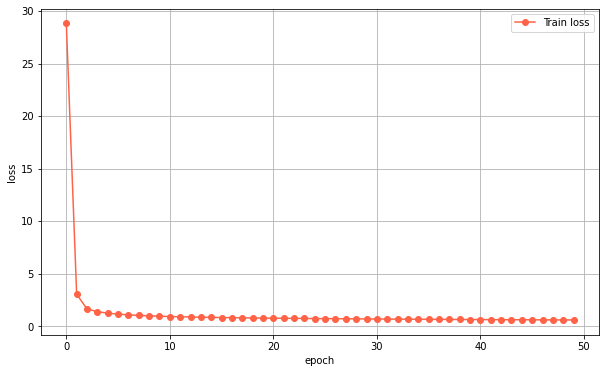

tensor(0.3877, grad_fn=<MseLossBackward>)


In [26]:
#定义优化器
optimizer = torch.optim.SGD(mlpreg.parameters(), lr=0.001, momentum=0.8)
loss_func = nn.MSELoss()
train_loss_all = []
for epoch in range(50):
    train_loss = 0
    train_num = 0
    for step, (b_x, b_y) in enumerate(train_loader):
        output = mlpreg(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    # if epoch % 5 == 0:
    train_loss_all.append(train_loss / train_num)
plt.figure(figsize=(10, 6))
plt.plot(train_loss_all, "o-", label="Train loss",c="tomato")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
print(loss)

MAE:  0.6890135722244841
MSE:  0.790801525390433
RMSE:  0.8892702206812241
r2:  0.6137377444092478


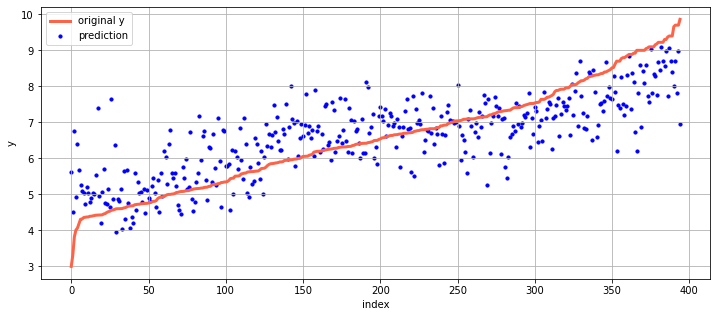

In [27]:
import math

#预测
y_test_np = y_test.values
pre_y = mlpreg(test_xt)  #MLP之后预测值
pre_y = pre_y.data.numpy()
mae = mean_absolute_error(y_test_np, pre_y)
mse = mean_squared_error(y_test_np, pre_y)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_np,pre_y)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("r2: ", r2)
index = np.argsort(y_test_np)
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y_test_np)), y_test_np[index], c="tomato", label="original y", linewidth=3)
plt.scatter(np.arange(len(pre_y)), pre_y[index], s=10, c="b", label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

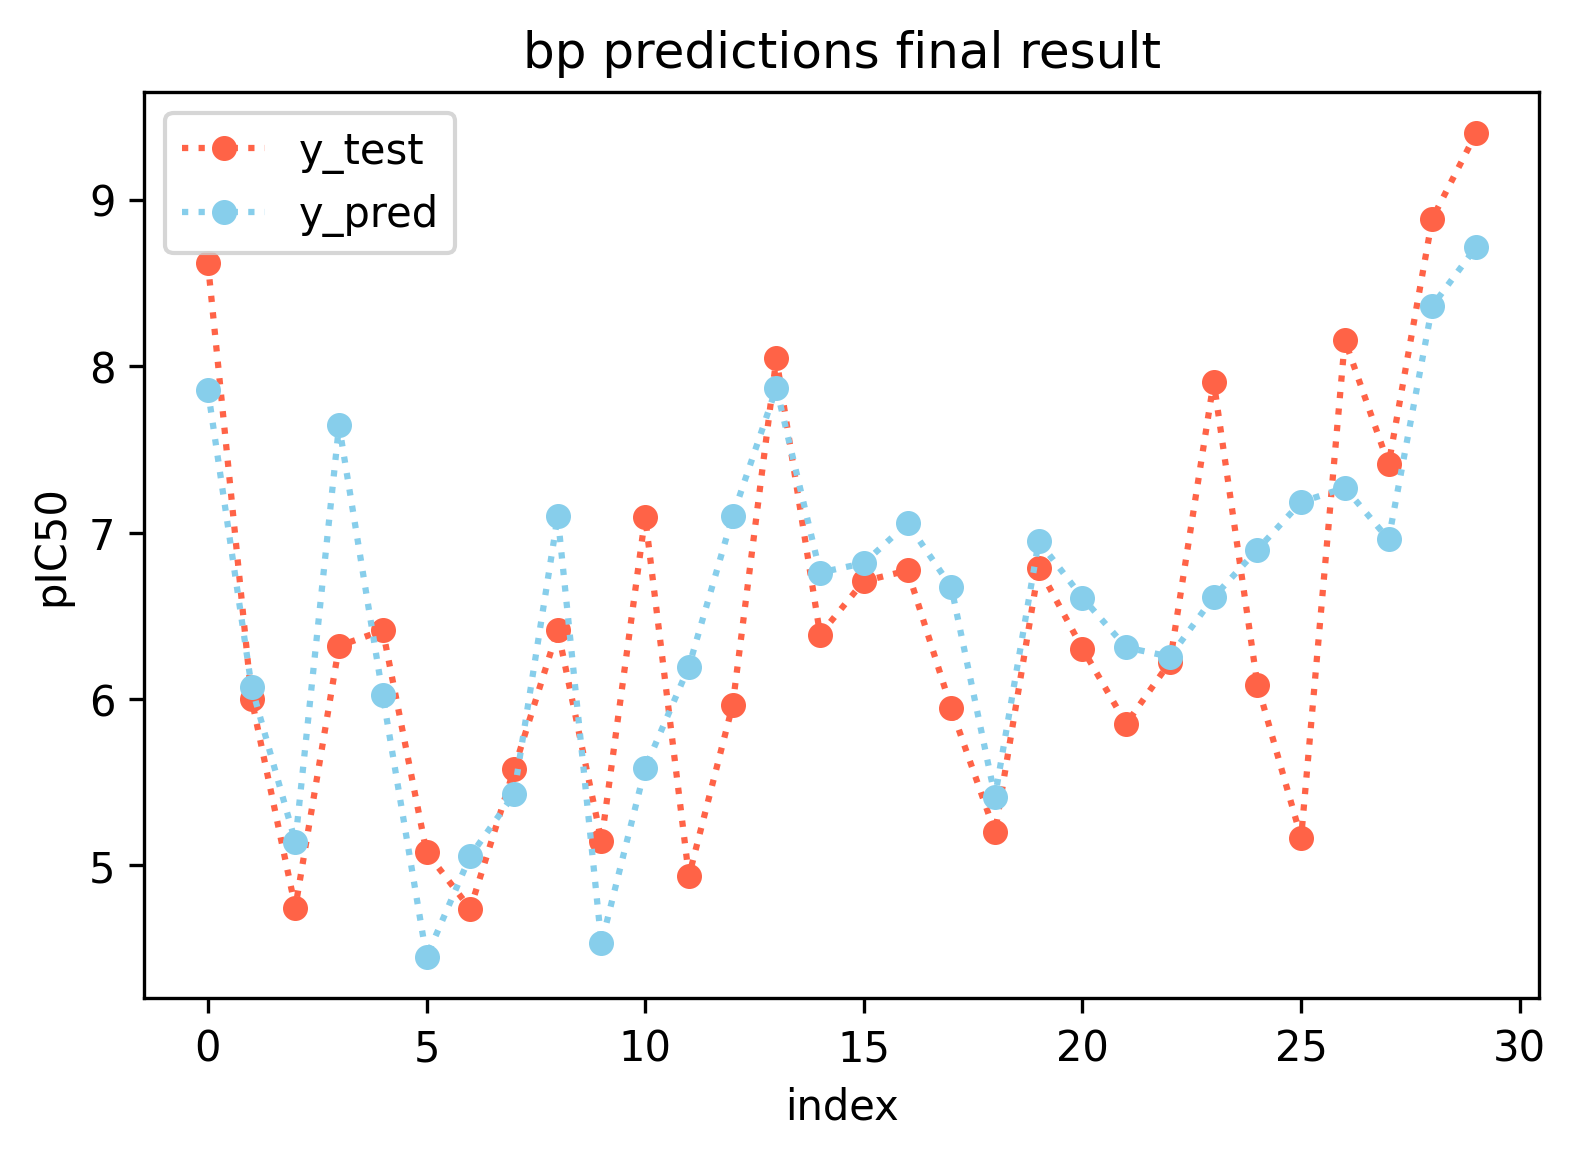

In [32]:
plt.figure(dpi=300)

plt.plot(y_test_np[150:180],color="tomato",label="y_test",linestyle=':',marker='o',ms=5) #颜色表示

plt.plot(pre_y[150:180],color="skyblue",label="y_pred",linestyle=':',marker='o',ms=5)

plt.xlabel("index") #x轴命名表示

plt.ylabel("pIC50") #y轴命名表示

plt.title("bp predictions final result")

plt.legend()#增加图例
